# Keras 개발 Process

1. 입력 텐서(X)와 출력 텐서(y)로 이뤄진 **훈련 데이터를 정의**

2. 입력과 출력을 연결하는 Layer(층)으로 이뤄진 **네트워크(모델)을 정의**
    - Sequential 방식: 순서대로 쌓아올린 네트워크로 이뤄진 모델을 생성하는 방식
    - Functional API 방식: 다양한 구조의 네트워크로 이뤄진 모델을 생성하는 방식
    - Subclass 방식: 네트워크를 정의하는 클래스를 구현.
    

3. **모델 Compile(컴파일)**
    - 모델이 Train(학습)할때 사용할 손실함수(Loss Function), 최적화기법(Optimizer), 학습과정을 모니터링할 평가지표(Metrics)를 설정
    
    > Compile: 실행할 수 있는 상태로 만들어 주는 것.

4. **Training(학습/훈련)**
    - Train dataset을 이용해 모델을 Train 시킨다.

# MNIST 이미지 분류 
- ### [MNIST](https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4)(Modified National Institute of Standards and Technology) database
- 흑백 손글씨 숫자 0-9까지 10개의 범주로 구분해놓은 데이터셋
- 하나의 이미지는 28 * 28 pixel 의 크기
- 6만개의 Train 이미지와 1만개의 Test 이미지로 구성됨.

##### import

In [1]:
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
 # seed값 설정
np.random.seed(0)
tf.random.set_seed(0)
random.seed(0)

2.11.0


##### MNIST dataset Loading

In [2]:
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()

In [3]:
train_image.shape, train_label.shape, test_image.shape, test_label.shape
# (60000, 28, 28) : (개수, 데이터shape-28,28), (60000, )

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
#y값 확인
train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

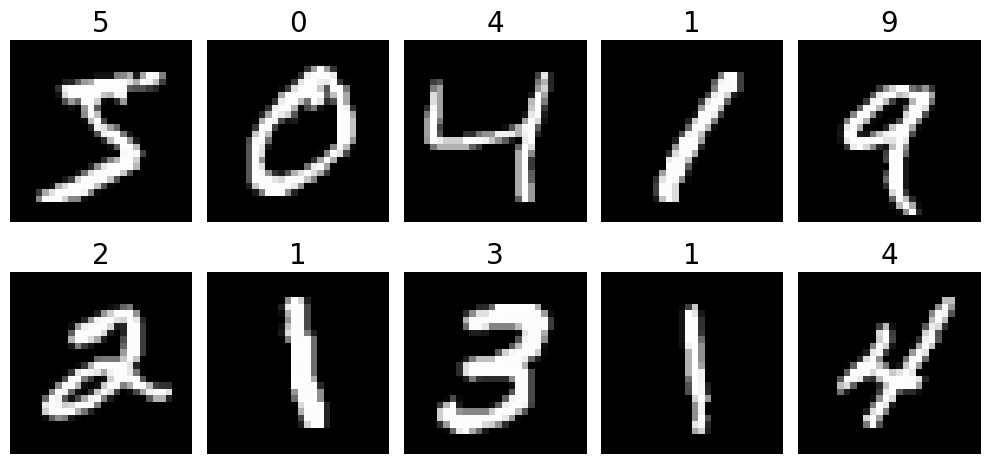

In [5]:
# X값-image 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_image[i], cmap='gray')
    plt.title(f'{train_label[i]}', fontsize=20)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [6]:
train_image[0].min(), train_image[0].max()

(0, 255)

## 데이터 준비
- X (Input Data Image)
    - 0 ~ 1 사이의 값으로 정규화 시킨다.
- y (Output Data)
    - one hot encoding 처리
        - Label이 다중분류(Multi class classification)일 경우 One Hot Encoding 한다.
            - 딥러닝 모델이 각 Label별 확률을 출력하도록 정의 되기 때문에 y(정답)도 같은 형태로 만들어 줘야 한다.
    - Keras의 onehot encoding 처리 함수
        - tensorflow.keras.utils.to_categorical()

##### input image(X)를 정규화. 
- 이미지를 0 ~ 1 로 정규화 하고 타입을 float32로 변환

In [7]:
train_image.dtype

dtype('uint8')

In [8]:
X_train = train_image.astype("float32")/255
X_test = test_image.astype('float32')/255

##### label(y)를 one hot encoding

In [9]:
np.unique(train_label, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [10]:
y_train = keras.utils.to_categorical(train_label, num_classes=10)
y_test = keras.utils.to_categorical(test_label)

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [11]:
train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [12]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## 네트워크(모델) 정의
- Network : 전체 모델 구조

In [13]:
model = keras.Sequential()  # (빈)모델생성
# 모델에 Layer 들을 추가한다.(쌓는다.)
# 각 레이어는 이전 Layer의 출력결과를 입력으로 받아서 처리한 뒤에 출력한다.
# Layer는 Unit/Node/Neuron 들로 구성된다. -> feature들을 입력받아서 처리후 출력하는 함수.

# 첫번째 Layer를 추가 -> 첫번째: InputLayer를 추가. -> (모델의) 입력 데이터의 shape을 설정하는 역할.
model.add(keras.layers.InputLayer((28, 28))) 

model.add(keras.layers.Flatten())  # 입력데이터를 1차원 배열로 변환.

model.add(keras.layers.Dense(units=256)) # unit 256개로 이뤄진 Layer를 생성. 각 unit은 선형회귀(W*X + B) 계산을 처리.

model.add(keras.layers.ReLU())  # max(X, 0) -> Activation(활성) 함수. => 비선형함수를 사용.

model.add(keras.layers.Dense(units=128))

model.add(keras.layers.ReLU())

model.add(keras.layers.Dense(units=10))

model.add(keras.layers.Softmax(name='output'))  # Output Layer->모델의 출력 결과를 출력하는 Layer

In [14]:
model2 = keras.Sequential([
    keras.layers.InputLayer((28,28)), 
    keras.layers.Flatten(),
    keras.layers.Dense(256),
    keras.layers.ReLU(),
    keras.layers.Dense(10),
    keras.layers.Softmax()
])


In [15]:
# 모델의 구조를 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 re_lu (ReLU)                (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 re_lu_1 (ReLU)              (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
 output (Softmax)            (None, 10)                0

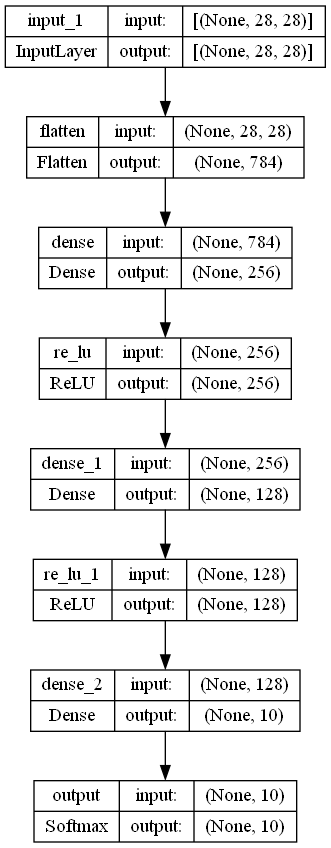

In [16]:
# 모델구조를 시각화 - graphviz
# pip install graphviz pydot pydotplus
keras.utils.plot_model(model, 
                       show_shapes=True  # 각 Layer의 input/output의 shape을 확인
                       , to_file='model_shapes.png'  # 저장할 파일명. 생략하면 model.png로 저장
                      )

## 컴파일 단계
- 정의된 딥러닝 모델을 학습할 수 있는 상태로 만들어 주기 위해 다음을 추가적으로 설정 한다.
    - Optimizer
    - 손실함수
    - 평가지표

In [17]:
model.compile(optimizer='adam', 
             loss='categorical_crossentropy', 
             metrics=['accuracy'] # 학습로그, 모델 평가 할때 loss(loss함수가 계산한 오차값)와 같이 나올 평가지표
             )

## 학습 (fit)
- model.fit()
    - 모델 학습 메소드. 
    - 학습과정의 Log를 History 객체로 반환한다.
- History : train 시 에폭별 평가지표값들을 모아서 제공.    

In [18]:
history = model.fit(X_train, y_train,   # train dataset
                      epochs=10,  # train dataset을 몇 번 반복해서 학습할 것인지.
                      batch_size=100, # 파라미터(wegith-학습대상)를 업데이터 하기 위한 데이터 단위. 업데이트 단위: step. 1 step에 입력할 데이터개수: batch_size
                      validation_split=0.3   # train set중 validation으로 사용할 데이터 비율.(전체중 70은 train에 30은 검증에 사용하겠다.)
                     )

Epoch 1/10
420/420 [==============================] - 3s 6ms/step - loss: 0.3010 - accuracy: 0.9130 - val_loss: 0.1614 - val_accuracy: 0.9531
Epoch 2/10
420/420 [==============================] - 2s 6ms/step - loss: 0.1165 - accuracy: 0.9654 - val_loss: 0.1221 - val_accuracy: 0.9646
Epoch 3/10
420/420 [==============================] - 2s 5ms/step - loss: 0.0737 - accuracy: 0.9781 - val_loss: 0.1032 - val_accuracy: 0.9698
Epoch 4/10
420/420 [==============================] - 2s 5ms/step - loss: 0.0510 - accuracy: 0.9843 - val_loss: 0.0996 - val_accuracy: 0.9712
Epoch 5/10
420/420 [==============================] - 2s 5ms/step - loss: 0.0353 - accuracy: 0.9889 - val_loss: 0.1119 - val_accuracy: 0.9687
Epoch 6/10
420/420 [==============================] - 2s 5ms/step - loss: 0.0279 - accuracy: 0.9918 - val_loss: 0.0958 - val_accuracy: 0.9734
Epoch 7/10
420/420 [==============================] - 2s 4ms/step - loss: 0.0221 - accuracy: 0.9932 - val_loss: 0.0975 - val_accuracy: 0.9745
Epoch 

In [19]:
# Epoch 1/10   # 현재 에폭/전체 에폭수 => 몇번째 에폭 결과.
# 420/420 [==============================] - 4s 8ms/step - loss: 0.3090 - accuracy: 0.9111 - val_loss: 0.1656 - val_accuracy: 0.9514

# 420/420: 현재학습중인step/전체step      
# 4s: 에폭당 걸린 학습시간 
# 8ms: 스텝당 걸린 학습시간

# train set 평가결과
# loss: 0.3090 - loss(손실-오차값)
# accuracy: 0.9111 - 컴파일 때 지정한 metrics의 결과.
    
# validation set 평가 결과
# val_loss: 0.1656 - val_accuracy: 0.9514

In [20]:
 # model2는 compile안한 모델
# model2.fit(X_train, y_train,   # train dataset
#                   epochs=8,  # train dataset을 몇 번 반복해서 학습할 것인지.
#                   batch_size=100, # 파라미터(wegith-학습대상)를 업데이터 하기 위한 데이터 단위. 업데이트 단위: step. 1 step에 입력할 데이터개수: batch_size
#                   validation_split=0.3   # train set중 validation으로 사용할 데이터 비율.(전체중 70은 train에 30은 검증에 사용하겠다.)
#                  )

##### History 시각화

In [19]:
print(type(history))  # 학습 과정의 평가지표들 등의 정보를 저장한 객체.
print("학습 에폭리스트: ", history.epoch)
print("에폭수, 에폭당 step수: ", history.params)

<class 'keras.callbacks.History'>
학습 에폭리스트:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
에폭수, 에폭당 step수:  {'verbose': 1, 'epochs': 10, 'steps': 420}


In [22]:
history.history

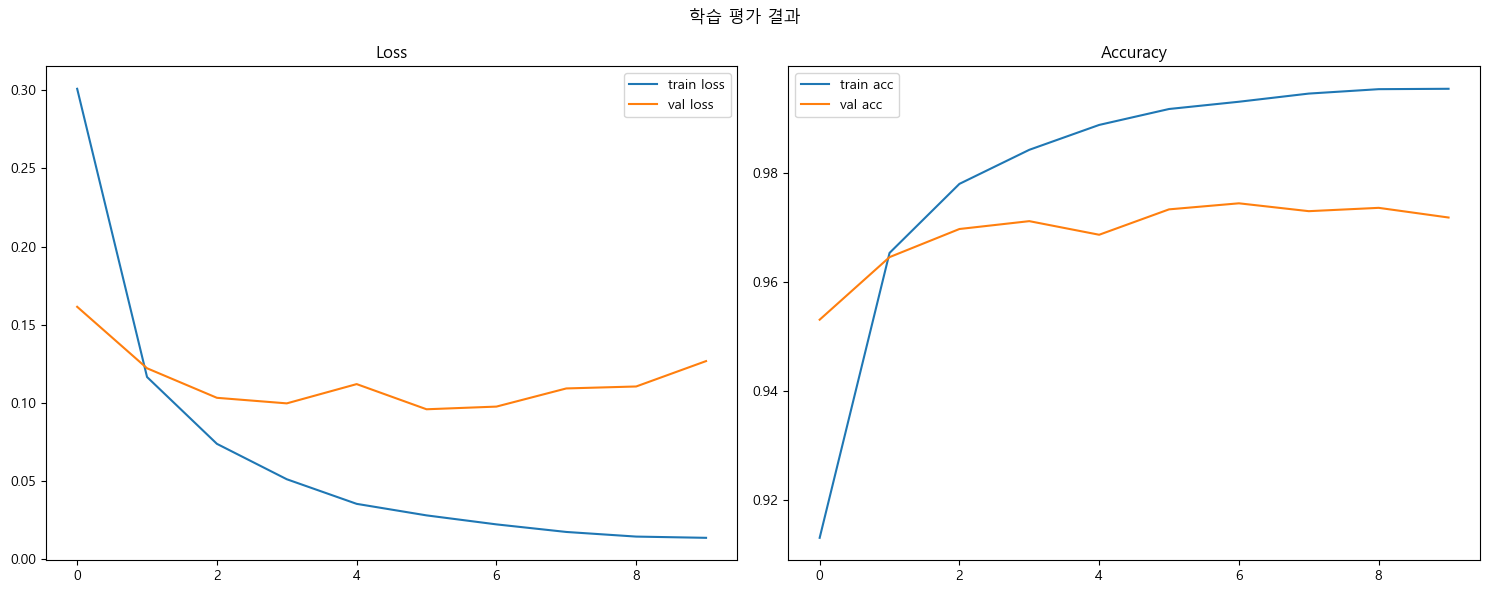

In [20]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'malgun gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15, 6))
plt.suptitle('학습 평가 결과')  #figure 제목

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
# plt.ylim(0.09, 0.15)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')

plt.legend()
plt.tight_layout()
plt.show()

## 테스트셋 평가

In [21]:
result = model.evaluate(X_test, y_test)   #loss, compile시 지정한 metrics 로 평가.

313/313 [==============================] - 1s 3ms/step - loss: 0.1031 - accuracy: 0.9749


In [22]:
result

[0.10311970114707947, 0.9749000072479248]

## 새로운 데이터 추론
- 새로운 데이터를 추론하기 전에 학습데이터에 했던 전처리과정을 동일하게 적용 한 뒤 추론한다.

### 추론 메소드
- predict()
    - **분류:** 각 클래스 별 확률 반환
    - **회귀:** 최종 예측 결과
- 분류문제일때 predict() 결과에서 class label 출력하기    
    - 이진 분류(binary classification)
        - `numpy.where(model.predict(x) > 0.5, 1, 0).astype("int32")`
    - 다중클래스 분류(multi-class classification)
        - `numpy.argmax(model.predict(x), axis=1)`

In [23]:
X_new = X_test[:3]
X_new.shape

(3, 28, 28)

In [24]:
pred = model.predict(X_new) # 추론: (개수, 데이터 shape)

1/1 [==============================] - 0s 100ms/step


In [26]:
print(pred.shape)
np.round(pred, 3)

(3, 10)


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [28]:
np.argmax(pred, axis=1)

array([7, 2, 1], dtype=int64)

In [29]:
np.argmax(y_test[:3], axis=-1)  # axis=-1 ==> 마지막 축

array([7, 2, 1], dtype=int64)

# TODO
1. opencv로 그림판으로 그린 숫자이미지들을 읽는다. (grayscale)

2. 28 X 28 로 resize 

3. 모델을 이용해서 추론

In [31]:
!pip install opencv-contrib-python

  Using cached opencv_contrib_python-4.7.0.68-cp37-abi3-win_amd64.whl (44.9 MB)


In [39]:
import cv2

two_tmp = cv2.imread('test_img/two.png', cv2.IMREAD_GRAYSCALE)
five_tmp = cv2.imread('test_img/five.png', cv2.IMREAD_GRAYSCALE)
eight_tmp = cv2.imread('test_img/eight.png', cv2.IMREAD_GRAYSCALE)

two = cv2.resize(two_tmp, (28,28), interpolation=cv2.INTER_AREA)
five = cv2.resize(five_tmp, (28,28), interpolation=cv2.INTER_AREA)
eight = cv2.resize(eight_tmp, (28,28), interpolation=cv2.INTER_AREA)

two_tmp.shape, type(two_tmp), two.shape, five.shape, eight.shape

((48, 51), numpy.ndarray, (28, 28), (28, 28), (28, 28))

In [41]:
cv2.imshow('frame', two)
cv2.waitKey(0)
cv2.imshow('frame', five)
cv2.waitKey(0)
cv2.imshow('frame', eight)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 이미지 전처리
- float으로 변환, scaling

In [46]:
new_data = np.array([two.astype('float32')/255, 
                     five.astype('float32')/255, 
                     eight.astype('float32')/255])
new_data.shape

(3, 28, 28)

In [48]:
new_data.max(), new_data.min()

(1.0, 0.0)

In [50]:
pred = model.predict(new_data)
print(pred.shape)
np.round(pred, 3)

1/1 [==============================] - 0s 27ms/step
(3, 10)


array([[0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.987, 0.   , 0.   , 0.012,
        0.   ],
       [0.001, 0.005, 0.011, 0.823, 0.   , 0.018, 0.09 , 0.   , 0.051,
        0.   ]], dtype=float32)

In [51]:
np.argmax(pred, axis=-1)

array([2, 5, 3], dtype=int64)